   Calories  Total Fat  Saturated Fat  Monounsaturated Fat  \
0     149.0          0            0.0                  0.0   
1     123.0          0            0.0                  0.0   
2     150.0          0            0.0                  0.0   
3     110.0          0            0.0                  0.0   
4     143.0          0            0.0                  0.0   

   Polyunsaturated Fat  Trans Fat  Cholesterol  Sodium  Total Carbohydrate  \
0                  0.0        0.0            0     9.0                 9.8   
1                  0.0        0.0            0     5.0                 6.6   
2                  0.0        0.0            0     4.0                11.4   
3                  0.0        0.0            0     6.0                 7.0   
4                  0.0        0.0            0     7.0                13.1   

   Dietary Fiber  Sugars  Sugar Alcohol  Protein  Vitamin A  Vitamin C  \
0            0.0     0.0              0      1.3          0          0   
1         

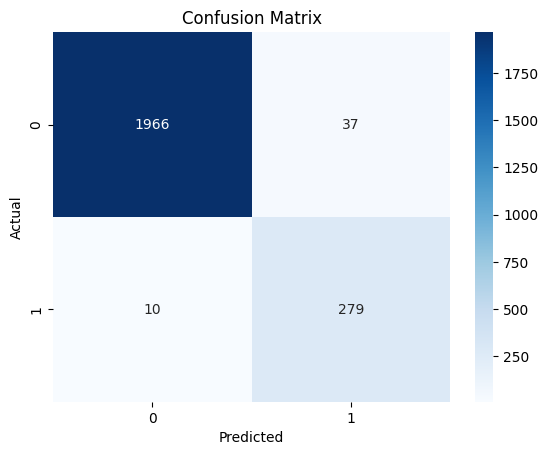

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('food_items_binary.csv')

print(data.head())
print(data.columns)
features=['Calories','Total Fat','Saturated Fat','Sugars','Dietary Fiber','Protein']
target='class'
X=data[features]
y=data[target]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

svm=SVC()

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto',]
}
grid_search=GridSearchCV(svm,param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train,y_train)
best_model=grid_search.best_estimator_
y_pred=best_model.predict(X_test)

print("NAME:Mena Rossini R")
print("Register Number:212222040099")
print("Best Parameters:",grid_search.best_params_)
print("Classisification Report:\n",classification_report(y_test,y_pred))
conf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()